Сахарова Дарья, Лабораторная работа 2, Вариант 17

гамма = 0.99
n = 10
M = 1750
K = 175
a = 1
sigma^2 = 2

ЧАСТЬ 1

In [1]:
import numpy as np
import math
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
from scipy.stats import norm


Пункт 1 - Моделирование выборки



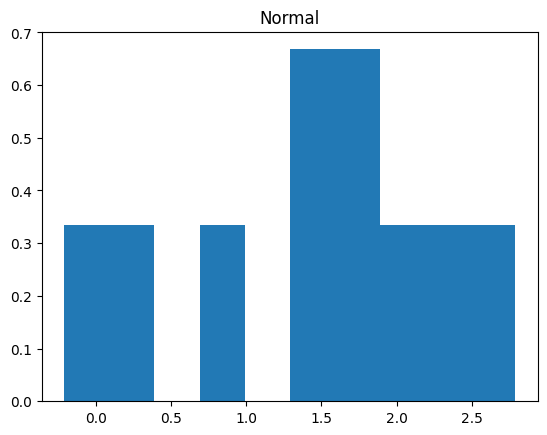

In [17]:

"""
    a — параметр, характеризующий среднее значение
    sigma — параметр, характеризующий разброс параметров
"""

a=1
ss = 2
sigma=np.sqrt(2)
n_points=10


print("\nПункт 1 - Моделирование выборки\n")

# генерация выборки с заданными параметрами

Sample = np.random.normal(a, sigma, 10)

# создание диаграммы
plt.hist(Sample, density=True, histtype='stepfilled', alpha=0.8)
plt.title('Normal')
plt.show()

1.1 - Интервальная оценка, если дисперсия известна

In [18]:
gamma=0.99

# значения выборки
a_estimate=np.mean(Sample)
sigma_estimate=statistics.stdev(Sample) 
dispersion = Sample.var() 

print("Параметры: ",a_estimate, dispersion, sigma_estimate)

# Вычисляем границы интервальной оценки математического ожидания при известной дисперсии

# "вручную"

interval_for_MX_=[0]*2 # создание списка
# Вычисление критического значения для заданного уровня доверия 
t_gamma=sts.norm.ppf(1/2+gamma/2, loc=0, scale=1)
print("Критическое значение = ",t_gamma)

interval_for_MX_[0]=a_estimate-sigma*t_gamma/np.sqrt(10)    # нижний предел
interval_for_MX_[1]=a_estimate+sigma*t_gamma/np.sqrt(10)    # верхний предел
print("Интервальная оценка мат.ожидания при известной дисперсии:\n", interval_for_MX_)

# с помощью встроенных статистических функций Питона
interval_estimate_2=sts.norm.interval(confidence=gamma, 
              loc=a_estimate,
              scale=sigma/np.sqrt(10)) 
print("\nИспользуя .interval:\n", interval_estimate_2)

Параметры:  1.4669839596598795 0.7533792531459089 0.9149251658201396
Критическое значение =  2.5758293035489004
Интервальная оценка мат.ожидания при известной дисперсии:
 [0.315038075425623, 2.618929843894136]

Используя .interval:
 (0.31503807542562323, 2.6189298438941355)


1.2 - Интервальная оценка, если дисперсия НЕ известна

In [19]:
# используем t-распределение: 
# 1 - Оно учитывает неопределенность, связанную с оценкой дисперсии
# 2 - Для малых выборок оно дает более точные доверительные интервалы.


# Вычисляем критическое значение 
t_degrees_of_freedom = len(Sample) - 1
t_alpha_over_2 = sts.t.ppf(1 - (1 - gamma) / 2, df=t_degrees_of_freedom)

# Вычисляем стандартную ошибку среднего значения
standard_error = sigma_estimate / np.sqrt(len(Sample))

# Вычисляем доверительный интервал для среднего значения
interval_estimate = (a_estimate - t_alpha_over_2 * standard_error, a_estimate + t_alpha_over_2 * standard_error)

print("Доверительный интервал при неизвестной дисперсии:\n", interval_estimate)

# Вычисляем доверительный интервал для среднего значения с использованием t-распределения

interval_estimate_2 = sts.t.interval(gamma, df=t_degrees_of_freedom, loc=a_estimate, scale=sigma_estimate / np.sqrt(len(Sample)))

print("\nИспользуя .interval:\n", interval_estimate_2)


Доверительный интервал при неизвестной дисперсии:
 (0.5267261317504462, 2.407241787569313)

Используя .interval:
 (0.5267261317504462, 2.407241787569313)


1.3 - Интервальная оценка для дисперсии 

In [20]:
# Степени свободы для распределения хи-квадрат
degrees_of_freedom = n_points - 1

# Вычисляем критические значения для хи-квадрат распределения
chi2_lower = sts.chi2.ppf((1 - gamma) / 2, df=degrees_of_freedom)
chi2_upper = sts.chi2.ppf((1 + gamma) / 2, df=degrees_of_freedom)

# Вычисляем интервальную оценку для дисперсии
variance_estimate = np.var(Sample, ddof=1)
variance_lower = (n_points - 1) * variance_estimate / chi2_upper
variance_upper = (n_points - 1) * variance_estimate / chi2_lower

# Выводим результат
print("Доверительный интервал для дисперсии:", variance_lower, variance_upper)

Доверительный интервал для дисперсии: 0.31937261017988533 4.342411461423974


2. Построить зависимости длины доверительного интервала от надежности при неизменном объеме выборки. 

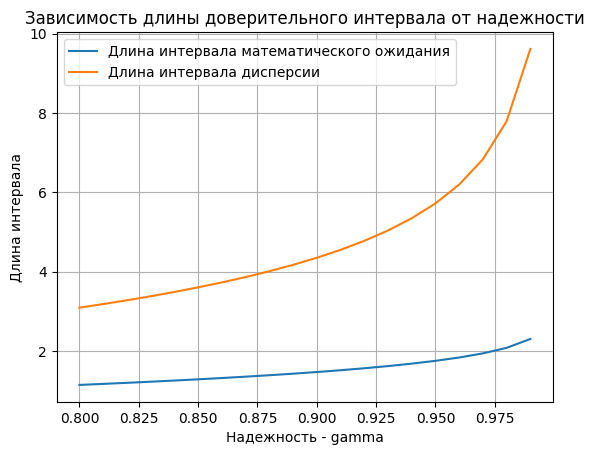

In [21]:

# Создадим список уровней доверия
confidence_levels = np.linspace(0.80, 0.99, 20)

# Списки для хранения длин интервалов для математического ожидания и дисперсии
mean_interval_lengths = []
variance_interval_lengths = []

for confidence_level in confidence_levels:
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(confidence_level, loc=a, scale=sigma / np.sqrt(n_points))
    
    # Вычисляем интервальную оценку для дисперсии
    degrees_of_freedom = n_points - 1
    variance_estimate = sigma**2
    chi2_lower, chi2_upper = sts.chi2.interval(confidence_level, df=degrees_of_freedom)
    variance_interval = (degrees_of_freedom * variance_estimate / chi2_upper,
                         degrees_of_freedom * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    mean_interval_lengths.append(mean_interval[1] - mean_interval[0])
    variance_interval_lengths.append(variance_interval[1] - variance_interval[0])


plt.plot(confidence_levels, mean_interval_lengths, label="Длина интервала математического ожидания")
plt.plot(confidence_levels, variance_interval_lengths, label="Длина интервала дисперсии")
plt.xlabel("Надежность - gamma")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от надежности")
plt.show()

3. Построить зависимости длины доверительного интервала от объема выборки при неизменной надежности

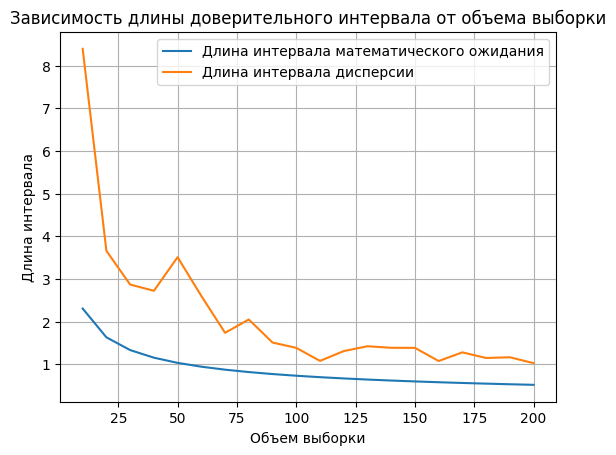

In [22]:
# Создадим список размеров выборок
sample_sizes = np.arange(10, 201, 10)

# Списки для хранения длин интервалов для математического ожидания и дисперсии
mean_interval_lengths = []
variance_interval_lengths = []

for n_points in sample_sizes:
    # Генерируем выборку
    Sample = np.random.normal(a, sigma, n_points)
    
    # Вычисляем интервальную оценку для математического ожидания
    mean_interval = sts.norm.interval(gamma, loc=np.mean(Sample), scale=sigma / np.sqrt(n_points))
    
    # Вычисляем интервальную оценку для дисперсии
    degrees_of_freedom = n_points - 1
    variance_estimate = np.var(Sample, ddof=1)
    chi2_lower, chi2_upper = sts.chi2.interval(gamma, df=degrees_of_freedom)
    variance_interval = (degrees_of_freedom * variance_estimate / chi2_upper,
                         degrees_of_freedom * variance_estimate / chi2_lower)
    
    # Вычисляем длину интервалов и добавляем их в списки
    mean_interval_lengths.append(mean_interval[1] - mean_interval[0])
    variance_interval_lengths.append(variance_interval[1] - variance_interval[0])

# Строим графики
plt.plot(sample_sizes, mean_interval_lengths, label="Длина интервала математического ожидания")
plt.plot(sample_sizes, variance_interval_lengths, label="Длина интервала дисперсии")
plt.xlabel("Объем выборки")
plt.ylabel("Длина интервала")
plt.legend()
plt.grid()
plt.title("Зависимость длины доверительного интервала от объема выборки")
plt.show()

4. Смоделировать M=1800 выборок из n=17 значений нормально распределенной случайной величины X с параметрами (a,sigma). По каждой из M выборок с надежностью gamma найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна. По результатам моделирования найти точечную оценку надежности gamma

In [23]:
M=1750

MX_left=[0]*M
MX_right=[0]*M

for i in range(M):
        
        sample = np.random.normal(a, sigma, n_points)
        mu_estimate=np.mean(sample)

        interval_estimate_2=sts.t.interval(confidence=gamma, df=len(sample)-1,
              loc=mu_estimate,
              scale=sts.sem(sample)) 
        
        MX_left[i]  = interval_estimate_2[0]
        MX_right[i] = interval_estimate_2[1]
        
s0=pd.Series(data=MX_left)
s1=pd.Series(data=MX_right)

# Вычисляется, сколько интервалов действительно покрывают истинное 
# математическое ожидание, и оценка надежности gamma_estimate 
# вычисляется как доля интервалов, покрывающих a, относительно общего 
# числа интервалов M.

COUNT_=((s0<a)&(s1>a)).sum()
gamma_estimate=COUNT_/M 

print('Точечная оценка надежности gamma^ = ',gamma_estimate)
print('gamma = ',gamma) 

Точечная оценка надежности gamma^ =  0.9914285714285714
gamma =  0.99


5. Моделирование М выборок 

In [24]:
# Создим список для хранения выборок
samples_M = []

# Моделирование M выборок
for i in range(M):
    sample = np.random.normal(a, sigma, n_points)
    samples_M.append(sample)

5.1 По каждой из M выборок найти наблюдаемое значение случайной величины Z


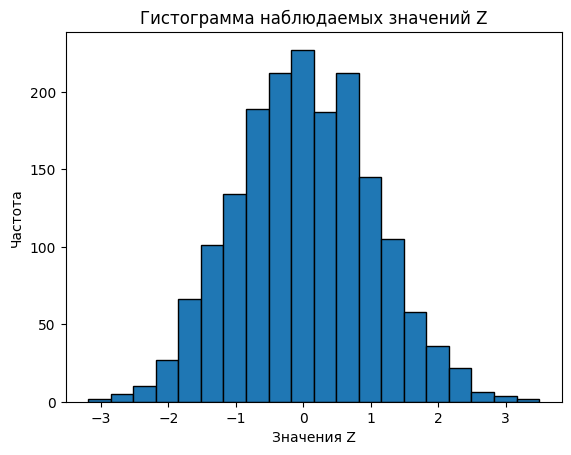

In [26]:
# Xср = (1/n) * ΣXi
# S^2 = (1/(n-1)) * Σ(Xi - Xср)^2
# Z = ((n - 1) * S^2) / (σ^2)

# Создим список для хранения наблюдаемых значений Z
observed_values_of_Z = []

# Моделирование M выборок
for i in range(M):
    
    # Вычисляем среднее значение Xср
    X_avg = np.mean(samples_M[i])
    
    # Вычисляем S^2
    S_squared = np.sum((samples_M[i] - X_avg)**2) / (n_points - 1)
    
    # Вычисляем наблюдаемое значение Z
    Z = ((X_avg - a)/np.sqrt(S_squared))*np.sqrt(n_points)
    
    observed_values_of_Z.append(Z)

# Строим гистограмму
plt.hist(observed_values_of_Z, bins=20, edgecolor='k')
plt.xlabel("Значения Z")
plt.ylabel("Частота")
plt.title("Гистограмма наблюдаемых значений Z")
plt.show()

5.2 Каков закон распределения величины Z

In [28]:
print("Z будет иметь распределение хи-квадрат с (10 - 1) = 9 степенями свободы.")

Z будет иметь распределение хи-квадрат с (10 - 1) = 9 степенями свободы.


5.3  Найти выборочные числовые характеристики случайной величины Z.

In [30]:

# Вычисляем среднее значение
mean_Z = np.mean(observed_values_of_Z)

# Вычисляем дисперсию
variance_Z = np.var(observed_values_of_Z)

# Вычисляем стандартное отклонение
std_deviation_Z = np.std(observed_values_of_Z)

# Вычисляем медиану
median_Z = np.median(observed_values_of_Z)

# Вычисляем минимальное и максимальное значения
min_Z = np.min(observed_values_of_Z)
max_Z = np.max(observed_values_of_Z)

# Выводим результат
print("Среднее значение Z:", mean_Z)
print("Дисперсия Z:", variance_Z)
print("Стандартное отклонение Z:", std_deviation_Z)
print("Медиана Z:", median_Z)
print("Минимальное значение Z:", min_Z)
print("Максимальное значение Z:", max_Z)

Среднее значение Z: 0.029310677524675564
Дисперсия Z: 1.0216355873376084
Стандартное отклонение Z: 1.0107599058815147
Медиана Z: 0.0017574821715157546
Минимальное значение Z: -3.1868073752951935
Максимальное значение Z: 3.4977632138949906


5.4 Гистограмма относительных частот и теоретическая кривая
распределения случайной величины Z, а также бокс-плот.

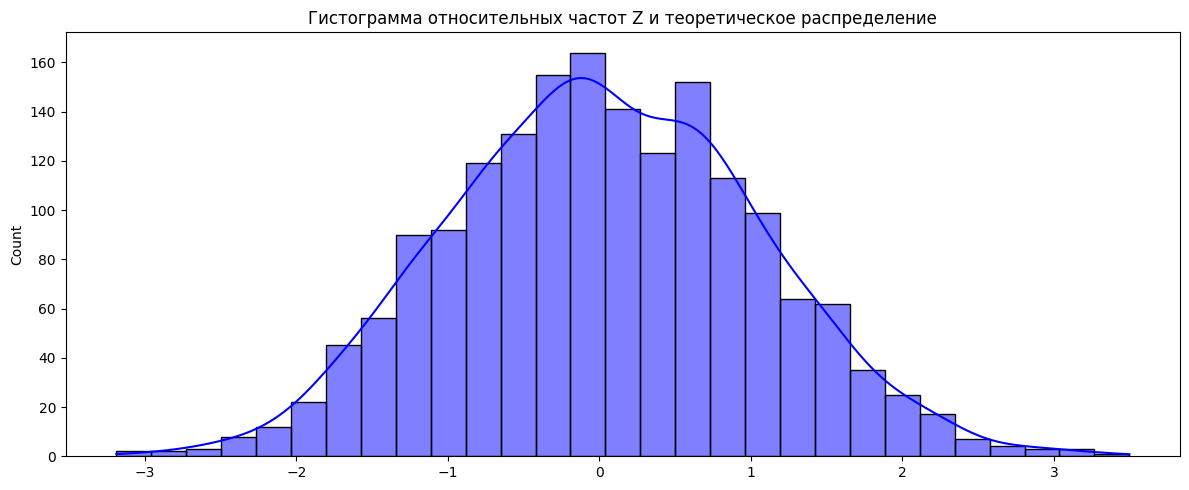

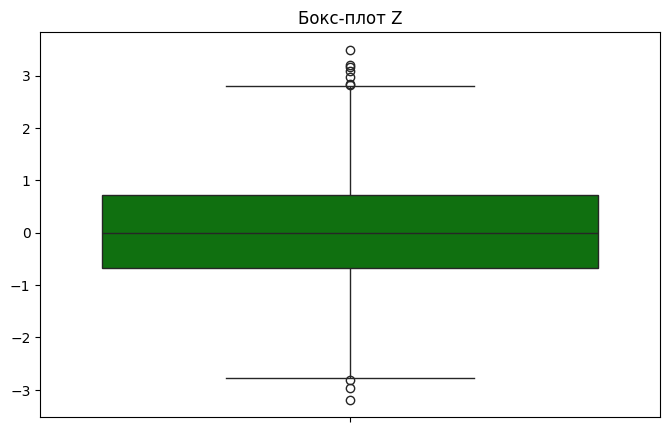

In [31]:
# Гистограмма относительных частот
plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
sns.histplot(observed_values_of_Z, kde=True, color='blue')
plt.title("Гистограмма относительных частот Z и теоретическое распределение")

plt.tight_layout()
plt.show()

# Бокс-плот
plt.figure(figsize=(8, 5))
sns.boxplot(y=observed_values_of_Z, color='green')
plt.title("Бокс-плот Z")
plt.show()

ЧАСТЬ 2

1. По каждой из M выборок найти интервальную оценку для дисперсии случайной величины X.
По результатам моделирования найти точечную оценку надежности.

In [32]:
# Создим список для хранения интервальных оценок дисперсии
confidence_intervals = []

# Моделирование M выборок
for i in range(M):
    sample = np.random.normal(a, sigma, n_points)
    
    # Вычисляем выборочную дисперсию
    sample_variance = np.var(sample, ddof=1)
    
    # Определение квантилей для поиска интервальной оценки
    alpha = 1 - gamma
    lower_quantile = sts.chi2.ppf(alpha / 2, df=n_points - 1)
    upper_quantile = sts.chi2.ppf(1 - alpha / 2, df=n_points - 1)
    
    # Вычисляем границы доверительного интервала для дисперсии
    lower_bound = ((n_points - 1) * sample_variance) / upper_quantile
    upper_bound = ((n_points - 1) * sample_variance) / lower_quantile
    
    confidence_intervals.append((lower_bound, upper_bound))

# Вычисляем точечную оценку надежности
count_covered = sum([lower <= sigma**2 <= upper for lower, upper in confidence_intervals])
gamma_estimate = count_covered / M

# Выводим результат
print("Точечная оценка надежности gamma:", gamma_estimate)

Точечная оценка надежности gamma: 0.9925714285714285


2. Повторив пункт 1. K раз, получите массив из K значений оценки. Найдите выборочные числовые характеристики оценки, постройте гистограмму относительных частот и бокс-плот. 
Каким может быть закон распределения оценки? 
Чему равны математическое ожидание и дисперсия оценки? 

Выборочное среднее: 0.9898024489795918
Выборочная дисперсия: 4.755842399000417e-06
Выборочное стандартное отклонение: 0.002180789398130965


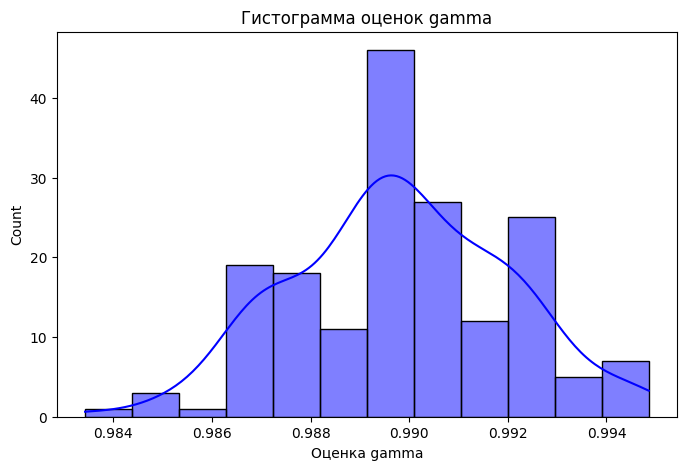

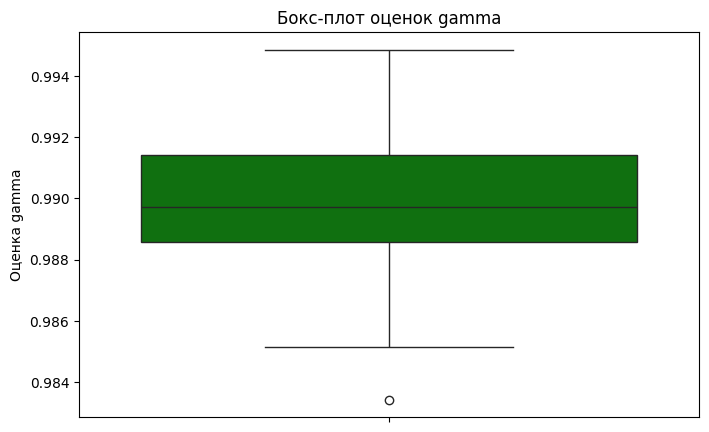

In [34]:
K = 175  # Количество повторений

# Создадим список для хранения оценок точечной надежности gamma
gamma_estimates = []

for _ in range(K):
    # Создим список для хранения интервальных оценок дисперсии
    confidence_intervals = []

    # Моделирование M выборок
    for i in range(M):
        sample = np.random.normal(a, sigma, n_points)
        
        # Вычисляем выборочную дисперсию
        sample_variance = np.var(sample, ddof=1)
        
        # Определение квантилей для поиска интервальной оценки
        alpha = 1 - gamma
        lower_quantile = sts.chi2.ppf(alpha / 2, df=n_points - 1)
        upper_quantile = sts.chi2.ppf(1 - alpha / 2, df=n_points - 1)
        
        # Вычисляем границы доверительного интервала для дисперсии
        lower_bound = ((n_points - 1) * sample_variance) / upper_quantile
        upper_bound = ((n_points - 1) * sample_variance) / lower_quantile
        
        confidence_intervals.append((lower_bound, upper_bound))

    # Вычисляем точечную оценку надежности
    count_covered = sum([lower <= sigma**2 <= upper for lower, upper in confidence_intervals])
    gamma_estimate = count_covered / M
    gamma_estimates.append(gamma_estimate)

# Вычислим выборочные числовые характеристики оценок точечной надежности
mean_gamma_estimate = np.mean(gamma_estimates)
variance_gamma_estimate = np.var(gamma_estimates)
std_deviation_gamma_estimate = np.std(gamma_estimates)

# Выводим результат
print("Выборочное среднее:", mean_gamma_estimate)
print("Выборочная дисперсия:", variance_gamma_estimate)
print("Выборочное стандартное отклонение:", std_deviation_gamma_estimate)

# Построим гистограмму относительных частот
plt.figure(figsize=(8, 5))
sns.histplot(gamma_estimates, kde=True, color='blue')
plt.title("Гистограмма оценок gamma")
plt.xlabel("Оценка gamma")
plt.show()

# Построим бокс-плот
plt.figure(figsize=(8, 5))
sns.boxplot(y=gamma_estimates, color='green')
plt.title("Бокс-плот оценок gamma")
plt.ylabel("Оценка gamma")
plt.show()


# Касательно закона распределения оценки, она может быть асимптотически 
# нормальной в соответствии с (ЦПТ) - сумма большого количества независимых 
# и одинаково распределенных случайных величин (независимых и одинаково 
# распределенных выборочных средних) будет приближаться к нормальному 
# распределению, независимо от исходного распределения случайных величин.

3.  Смоделировать M выборок из n значений случайной величины W, закон распределения которой указан в Вашем варианте. По каждой из M выборок с надежностью найти интервальную оценку (доверительный интервал) для дисперсии случайной величины W. По результатам моделирования найти точечную оценку надежности.


In [67]:
# Заданные параметры
k1 = -1
k2 = 0
n = 10
M_3 = 1750
gamma_3 = 0.99

# 2*к2^2(к1 + к2 - 2) / (k1 * (k2 - 2)^2) * (k2 - 4))
std3 = ((0 - (-1)) **2 / 12) * 4 / 16 



# Создадим список для хранения интервальных оценок дисперсии
confidence_intervals_3 = []
# gamma_estimate_3 = 0
for _ in range(M_3):
    # Генерируем n=10 значений случайной величины W
    sample_W = []
    for _ in range(n):
        U_values = np.random.uniform(k1, k2, size=4)
        W = (1/4) * np.sum(U_values)
        sample_W.append(W)
    
    # Вычисляем выборочную дисперсию
    sample_variance = np.var(sample_W, ddof=1)
    
    # Определение квантилей для поиска интервальной оценки
    alpha = 1 - gamma_3
    lower_quantile = sts.chi2.ppf(alpha / 2, df=n - 1)
    upper_quantile = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
    
    # Вычисляем границы доверительного интервала для дисперсии
    lower_bound = (n - 1) * sample_variance / upper_quantile
    upper_bound = (n - 1) * sample_variance / lower_quantile
    
    confidence_intervals_3.append((lower_bound, upper_bound))

# Вычисляем точечную оценку надежности
count_covered_3 = sum([lower <= std3 <= upper for lower, upper in confidence_intervals_3])
gamma_estimate_3 = count_covered_3 / M_3

# Выводим результат
print("Точечная оценка надежности gamma:", gamma_estimate_3)


Точечная оценка надежности gamma: 0.9937142857142857


4.  Повторив пункт 3. 175 раз, получите массив из 175 значений оценки. Найдите выборочные числовые характеристики точечной оценки, постройте гистограмму относительных частот и бокс-плот. Каким может быть закон распределения оценки? 

Выборочное среднее: 0.9940114285714285
Выборочная дисперсия: 3.872988921282796e-06
Выборочное стандартное отклонение: 0.0019679910877041075


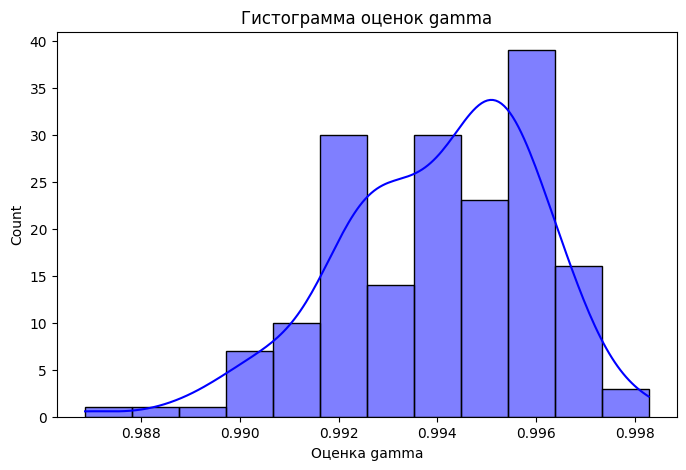

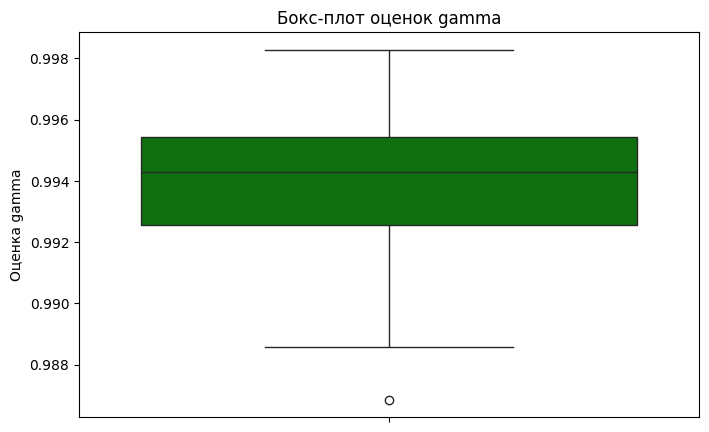

In [69]:
K = 175  # Количество повторений

# Создадим список для хранения оценок точечной надежности gamma
gamma_estimates2 = []

for _ in range(K):
    # Создим список для хранения интервальных оценок дисперсии
    confidence_intervals_3 = []
    # gamma_estimate_3 = 0
    for _ in range(M_3):
        # Генерируем n=17 значений случайной величины W
        sample_W = []
        for _ in range(n):
            U_values = np.random.uniform(k1, k2, size=4)
            W = (1/4) * np.sum(U_values)
            sample_W.append(W)
        
        # Вычисляем выборочную дисперсию
        sample_variance = np.var(sample_W, ddof=1)
        
        # Определение квантилей для поиска интервальной оценки
        alpha = 1 - gamma_3
        lower_quantile = sts.chi2.ppf(alpha / 2, df=n - 1)
        upper_quantile = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
        
        # Вычисляем границы доверительного интервала для дисперсии
        lower_bound = (n - 1) * sample_variance / upper_quantile
        upper_bound = (n - 1) * sample_variance / lower_quantile
        
        confidence_intervals_3.append((lower_bound, upper_bound))

    # Вычисляем точечную оценку надежности
    count_covered_3 = sum([lower <= std3 <= upper for lower, upper in confidence_intervals_3])
    gamma_estimate_3 = count_covered_3 / M_3
    gamma_estimates2.append(gamma_estimate_3)

# Вычислим выборочные числовые характеристики оценок точечной надежности
mean_gamma_estimate = np.mean(gamma_estimates2)
variance_gamma_estimate = np.var(gamma_estimates2)
std_deviation_gamma_estimate = np.std(gamma_estimates2)

# Выводим результат
print("Выборочное среднее:", mean_gamma_estimate)
print("Выборочная дисперсия:", variance_gamma_estimate)
print("Выборочное стандартное отклонение:", std_deviation_gamma_estimate)

# Построим гистограмму относительных частот
plt.figure(figsize=(8, 5))
sns.histplot(gamma_estimates2, kde=True, color='blue')
plt.title("Гистограмма оценок gamma")
plt.xlabel("Оценка gamma")
plt.show()

# Построим бокс-плот
plt.figure(figsize=(8, 5))
sns.boxplot(y=gamma_estimates2, color='green')
plt.title("Бокс-плот оценок gamma")
plt.ylabel("Оценка gamma")
plt.show()